In [0]:
# Install Pytesseract Library

!sudo apt install tesseract-ocr
!pip install pytesseract

In [0]:
# Import required packages

import pytesseract as ocr
from PIL import Image
import re
import matplotlib.pyplot as plt

In [0]:
# Mount Google Drive if working on Colab

from google.colab import drive
drive.mount("/drive")

In [0]:
# Pre-process Input Image

input_path = "/drive/My Drive/Colab Notebooks/test.png"

img = Image.open(input_path)
img = img.convert(mode='RGBA')
pixels = img.load()

# Can be adjusted for better results
opacity_limit = 128

for x in range(img.size[0]):
    for y in range(img.size[1]):
        if pixels[x,y][0]<opacity_limit or pixels[x,y][1]<opacity_limit or pixels[x,y][2]<opacity_limit:
            pixels[x, y] = (0, 0, 0, 255)
        else:
            pixels[x, y] = (255, 255, 255, 255)

img.save("preprocessed_img.png")

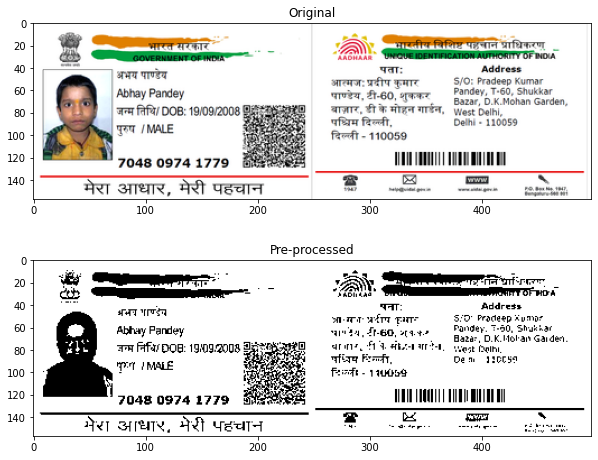

In [54]:
# Show Original and Preprocess Images

# original = Image.open(input_path)
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.title("Original")
plt.imshow(Image.open(input_path))

plt.subplot(2,1,2)
plt.title("Pre-processed")
plt.imshow(Image.open("preprocessed_img.png"))

plt.show()

In [55]:
# OCR using Pytesseract

result = ocr.image_to_string(Image.open("preprocessed_img.png"),lang="eng")
print(result)

> TT
axon
Abu Pandey
x Far DOB: 19099008 8
"pr IME

7048 0974 1779
ART AMY, AN) Gear

  

 

anne 8 dicaarta, ea bein
wire Dea Sboese
RoR rudee


In [0]:
# Search Possible UIDs

lines = result.split('\n')
possible_UIDs = []

for line in lines:
  
  words = line.split()

  if(len(words)==0):
    continue

  UID = re.search("[0-9]{4}\s[0-9]{4}\s[0-9]{4}",line)    

  if UID!=None:
    possible_UIDs.append(UID.group())

In [57]:
# Print Results

print(possible_UIDs)

['7048 0974 1779']
